In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import time
from numpy import arange, sin, pi, random


In [11]:
# Global hyper-parameters
sequence_length = 100
random_data_dup = 10  # each sample randomly duplicated between 0 and 9 times, see dropin function

In [9]:
def dropin(X, y):
    """ The name suggests the inverse of dropout, i.e. adding more samples. See Data Augmentation section at
    http://simaaron.github.io/Estimating-rainfall-from-weather-radar-readings-using-recurrent-neural-networks/
    :param X: Each row is a training sequence
    :param y: Tne target we train and will later predict
    :return: new augmented X, y
    """
    print("X shape:", X.shape)
    print("y shape:", y.shape)
    X_hat = []
    y_hat = []
    for i in range(0, len(X)):
        for j in range(0, np.random.random_integers(0, random_data_dup)):
            X_hat.append(X[i, :])
            y_hat.append(y[i])
    return np.asarray(X_hat), np.asarray(y_hat)

In [2]:
def gen_wave():
    """ Generate a synthetic wave by adding up a few sine waves and some noise
    :return: the final wave
    """
    t = np.arange(0.0, 10.0, 0.01)
    wave1 = sin(2 * 2 * pi * t)
    noise = random.normal(0, 0.1, len(t))
    wave1 = wave1 + noise
    print("wave1", len(wave1))
    wave2 = sin(2 * pi * t)
    print("wave2", len(wave2))
    t_rider = arange(0.0, 0.5, 0.01)
    wave3 = sin(10 * pi * t_rider)
    print("wave3", len(wave3))
    insert = int(round(0.8 * len(t)))
    wave1[insert:insert + 50] = wave1[insert:insert + 50] + wave3
    return wave1 + wave2


In [7]:
def z_norm(result):
    result_mean = result.mean()
    result_std = result.std()
    result -= result_mean
    result /= result_std
    return result, result_mean

In [3]:
def get_split_prep_data(train_start, train_end,
                          test_start, test_end):
    data = gen_wave()
    print("Length of Data", len(data))

    # train data
    print "Creating train data..."

    result = []
    for index in range(train_start, train_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    print "Mean of train data : ", result_mean
    print "Train data shape  : ", result.shape

    train = result[train_start:train_end, :]
    np.random.shuffle(train)  # shuffles in-place
    X_train = train[:, :-1]
    y_train = train[:, -1]
    X_train, y_train = dropin(X_train, y_train)

    # test data
    print "Creating test data..."

    result = []
    for index in range(test_start, test_end - sequence_length):
        result.append(data[index: index + sequence_length])
    result = np.array(result)  # shape (samples, sequence_length)
    result, result_mean = z_norm(result)

    print "Mean of test data : ", result_mean
    print "Test data shape  : ", result.shape

    X_test = result[:, :-1]
    y_test = result[:, -1]

    print("Shape X_train", np.shape(X_train))
    print("Shape X_test", np.shape(X_test))

    X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
    X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

    return X_train, y_train, X_test, y_test


In [12]:
print 'loading data...'
X_train, y_train, X_test, y_test = get_split_prep_data(0, 700, 500, 1000)

loading data...
('wave1', 1000)
('wave2', 1000)
('wave3', 50)
('Length of Data', 1000)
Creating train data...
Mean of train data :  -0.00415809717388
Train data shape  :  (600, 100)
('X shape:', (600, 99))
('y shape:', (600,))
Creating test data...
Mean of test data :  0.0169703820006
Test data shape  :  (400, 100)
('Shape X_train', (3004, 99))
('Shape X_test', (400, 99))


/home/luohuifen/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  del sys.path[0]


[[ -2.31752158e-01]
 [ -3.31872674e-01]
 [ -4.86269566e-01]
 [ -4.21589106e-01]
 [ -1.32304568e-01]
 [  3.79195923e-02]
 [ -1.32036267e-02]
 [ -8.20127034e-03]
 [  1.76070235e-02]
 [  3.10074027e-01]
 [  3.57637140e-01]
 [  2.35789392e-01]
 [  3.23399537e-01]
 [  2.87384579e-01]
 [  5.61688275e-01]
 [  4.72296760e-01]
 [  3.10959508e-01]
 [  4.01906727e-01]
 [  3.57589390e-01]
 [  2.62106236e-01]
 [  1.25882078e-01]
 [  1.72375843e-01]
 [  1.55825806e-01]
 [ -5.94918869e-02]
 [ -2.94153181e-01]
 [ -3.11063264e-01]
 [ -3.38920019e-01]
 [ -5.24076675e-01]
 [ -8.20249717e-01]
 [ -7.78021499e-01]
 [ -9.18122531e-01]
 [ -1.09564821e+00]
 [ -1.16558275e+00]
 [ -1.37053956e+00]
 [ -1.37469472e+00]
 [ -1.52626402e+00]
 [ -1.47916699e+00]
 [ -1.65680981e+00]
 [ -1.77017876e+00]
 [ -1.85490709e+00]
 [ -1.63776253e+00]
 [ -1.77855639e+00]
 [ -1.69621261e+00]
 [ -1.58542434e+00]
 [ -1.70281150e+00]
 [ -1.17597694e+00]
 [ -1.40804759e+00]
 [ -1.38412383e+00]
 [ -1.29799780e+00]
 [ -9.87830459e-01]


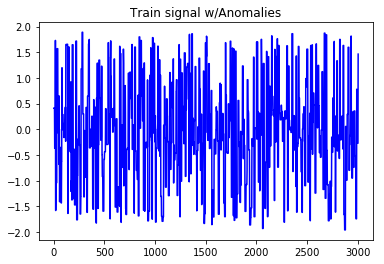

In [29]:
print X_train[10]
print y_train[10]
print X_test[0][1]
print y_test[1]
plt.figure()
#plt.subplot(211)
plt.title("Train signal w/Anomalies")
plt.plot(y_train[:len(y_train)],'b')

#plt.subplot(212)
#plt.title("Test signal w/Anomalies")
#plt.plot(y_test[:len(y_train)],'b')
plt.show()